In [91]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
df = pd.read_csv("../data/mllab.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,45824,Female,77.0,1,0,Yes,Self-employed,Urban,102.01,29.5,Unknown,0
1014,61838,Female,50.0,0,0,Yes,Govt_job,Urban,128.63,23.1,Unknown,0
1015,57212,Male,49.0,0,0,No,Private,Urban,144.10,30.7,smokes,0
1016,62668,Female,51.0,0,0,Yes,Self-employed,Urban,143.15,44.7,formerly smoked,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1018 non-null   int64  
 1   gender             1018 non-null   object 
 2   age                1018 non-null   float64
 3   hypertension       1018 non-null   int64  
 4   heart_disease      1018 non-null   int64  
 5   ever_married       1018 non-null   object 
 6   work_type          1018 non-null   object 
 7   Residence_type     1018 non-null   object 
 8   avg_glucose_level  1018 non-null   float64
 9   bmi                960 non-null    float64
 10  smoking_status     1018 non-null   object 
 11  stroke             1018 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 95.6+ KB


In [94]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,960.000000,1018.000000
mean,36550.242633,48.123222,0.131631,0.080550,112.078527,29.675313,0.244597
std,21159.323437,22.829802,0.338255,0.272277,49.717185,7.982647,0.430059
min,84.000000,0.240000,0.000000,0.000000,55.250000,12.000000,0.000000
25%,17415.250000,30.000000,0.000000,0.000000,78.060000,24.300000,0.000000
50%,36628.000000,52.000000,0.000000,0.000000,94.625000,28.500000,0.000000
75%,54920.250000,68.000000,0.000000,0.000000,122.935000,34.100000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,78.000000,1.000000


In [95]:
# Copy the original dataframe
df_1 = df.copy()

# Normalize numerical values
scaler = MinMaxScaler()
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
df_1[numerical_cols] = scaler.fit_transform(df_1[numerical_cols])
df_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,0.816536,0,1,Yes,Private,Urban,0.801146,0.372727,formerly smoked,1
1,51676,Female,0.743151,0,0,Yes,Self-employed,Rural,0.678830,NaN,never smoked,1
2,31112,Male,0.975538,0,1,Yes,Private,Rural,0.234052,0.310606,never smoked,1
3,60182,Female,0.596380,0,0,Yes,Private,Urban,0.535729,0.339394,smokes,1
4,1665,Female,0.963307,1,0,Yes,Self-employed,Rural,0.549078,0.181818,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,45824,Female,0.938845,1,0,Yes,Self-employed,Urban,0.215992,0.265152,Unknown,0
1014,61838,Female,0.608611,0,0,Yes,Govt_job,Urban,0.338953,0.168182,Unknown,0
1015,57212,Male,0.596380,0,0,No,Private,Urban,0.410412,0.283333,smokes,0
1016,62668,Female,0.620841,0,0,Yes,Self-employed,Urban,0.406023,0.495455,formerly smoked,0


In [96]:
# Copy the original dataframe
df_2 = df.copy()

# Convert string columns to categorical
string_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in string_cols:
    df_2[col] = df_2[col].astype('category')

# Remove rows with missing values
df_2.dropna(inplace=True)

# One-hot encode categorical variables
df_2_encoded = pd.get_dummies(df_2, columns=string_cols, drop_first=True)

# Normalize numerical values
scaler = MinMaxScaler()
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
df_2[numerical_cols] = scaler.fit_transform(df_2[numerical_cols])

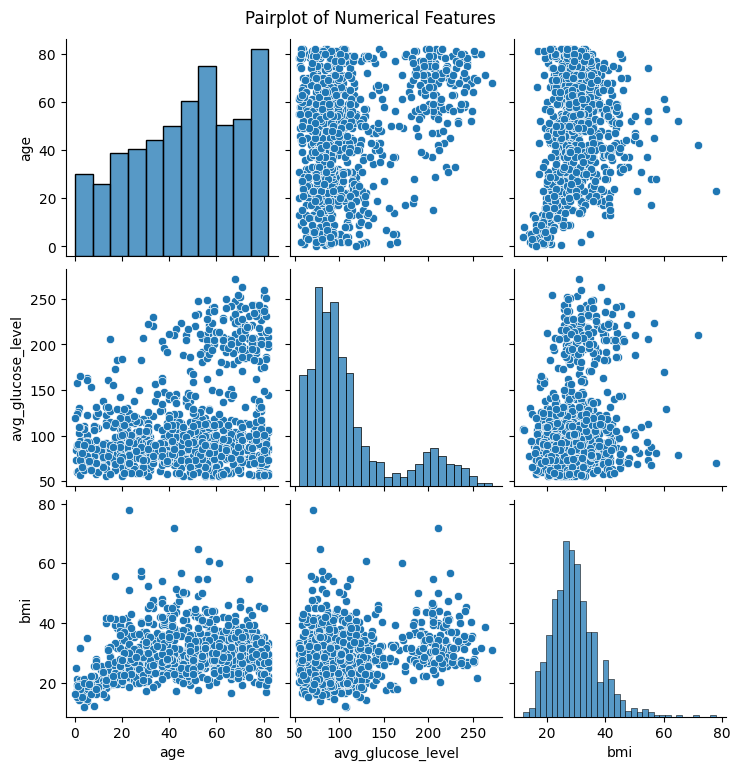

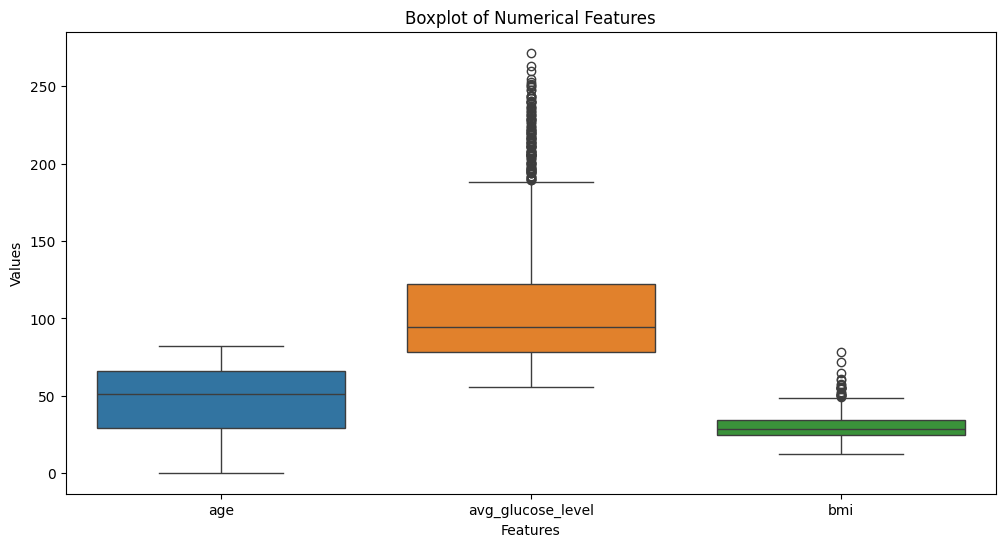

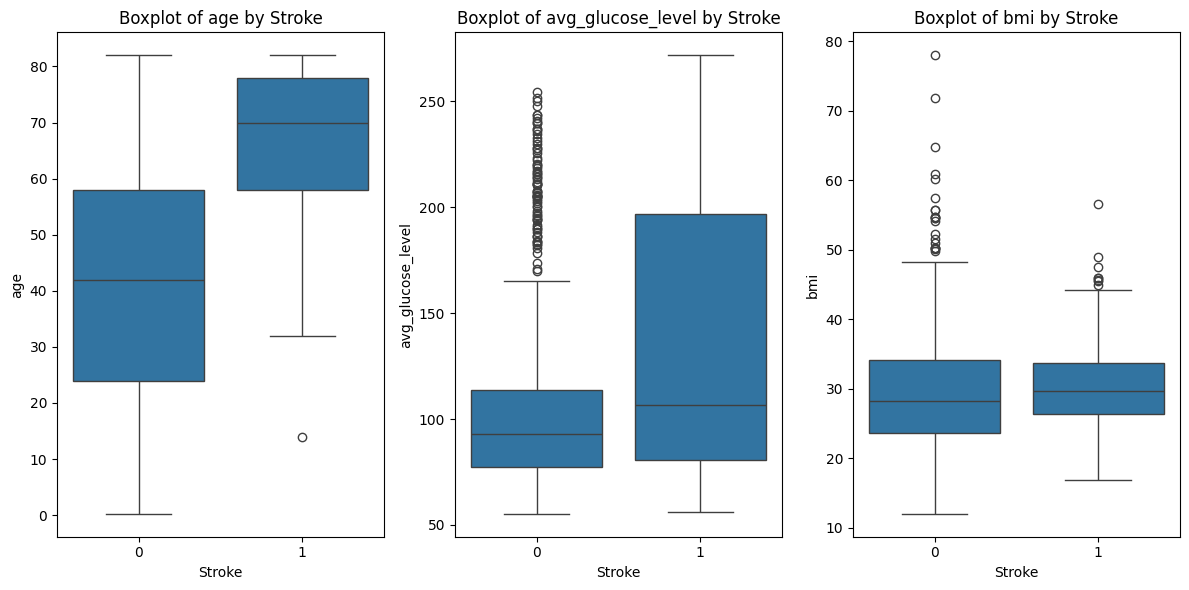

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for numerical features
sns.pairplot(df_2_encoded[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2_encoded[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# Box plots for numerical features by stroke
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='stroke', y=col, data=df_2_encoded)
    plt.title(f'Boxplot of {col} by Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



Model for df_2:


/home/vivekup3424/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


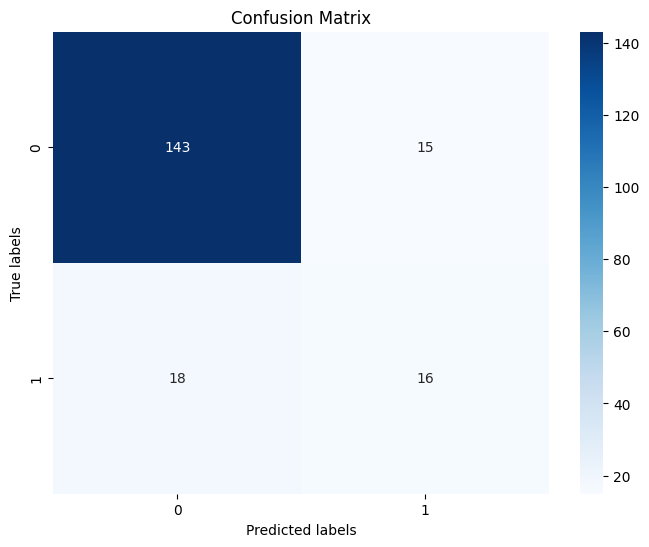


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       158
           1       0.52      0.47      0.49        34

    accuracy                           0.83       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.82      0.83      0.82       192



In [102]:
import seaborn as sns

def train_logistic_model(df):
    # Splitting the data into features (X) and target variable (y)
    X = df.drop('stroke', axis=1)
    y = df['stroke']

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Creating a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualizing the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Train and evaluate logistic regression model on df_2
print("\nModel for df_2:")
train_logistic_model(df_2_encoded)


In [99]:
#converting the gender,never_married,work_type,Residence
# Convert string columns to categorical

string_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in string_cols:
    df[col] = df[col].astype('category')

#do one-hot encoding for the categorical values
df_encoded = pd.get_dummies(df, columns=string_cols, drop_first=True)

# Number of rows with missing values
missing_rows = df_encoded[df_encoded.isnull().any(axis=1)]
print("Number of rows with missing values:", len(missing_rows))

#if the missing value is numerical, replace it with the knn value
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

df_imputed
df = df_imputed
df

Number of rows with missing values: 58


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,67.0,0.0,1.0,228.69,36.60,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676.0,61.0,0.0,0.0,202.21,34.58,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,105.92,32.50,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,171.23,34.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,45824.0,77.0,1.0,0.0,102.01,29.50,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1014,61838.0,50.0,0.0,0.0,128.63,23.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1015,57212.0,49.0,0.0,0.0,144.10,30.70,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1016,62668.0,51.0,0.0,0.0,143.15,44.70,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


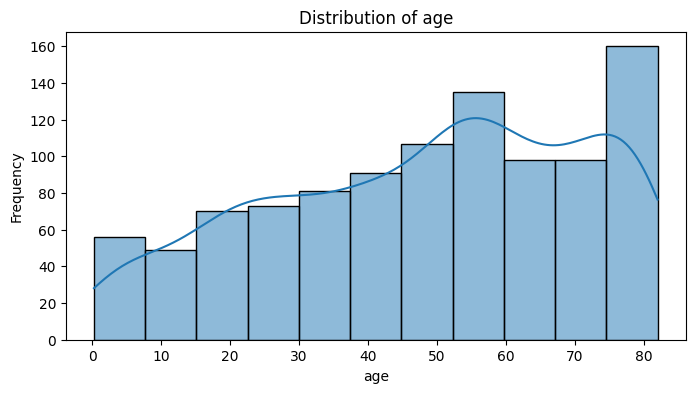

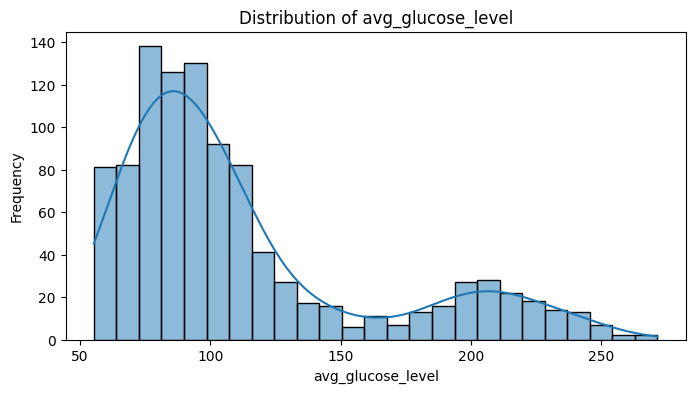

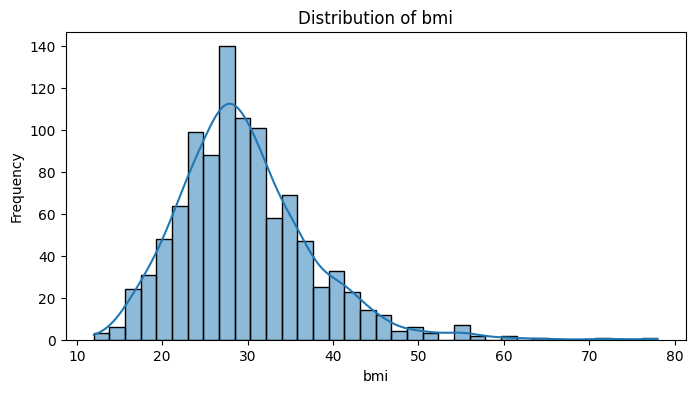

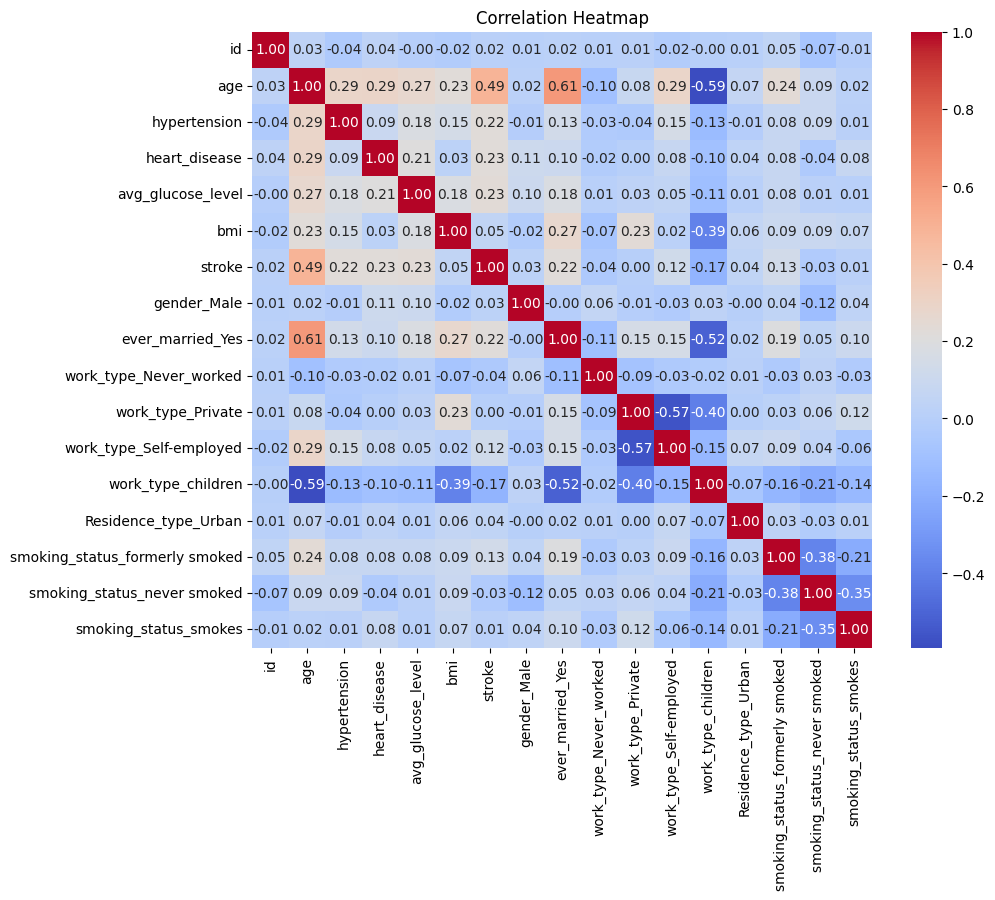

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and Density Plots for Numerical Features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


/home/vivekup3424/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[132  28]
 [ 21  23]]


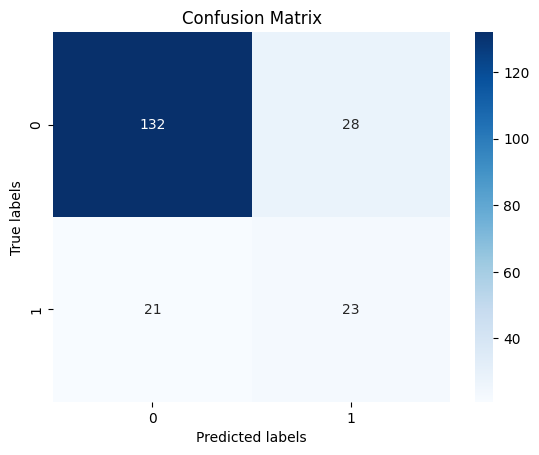


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       160
         1.0       0.45      0.52      0.48        44

    accuracy                           0.76       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.77      0.76      0.77       204



In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Splitting the data into features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
